# Rad Lab

СБМ20 (SBM20) Geiger-Müller tube simulations

© 2025 by Gissio

## Settings

In [7]:
detector_geometry = "data/geometry.toml"
detector_label = "СБМ20 (SBM20)"
N_montecarlo = 100000000

## Detector geometry

![J305 Geometry](data/geometry.png)

In [8]:
import sys
if '../../tools' not in sys.path:
    sys.path.append('../../tools')

import radlab

# %matplotlib widget

source_area = radlab.get_source_area(detector_geometry)

## Detector efficiency

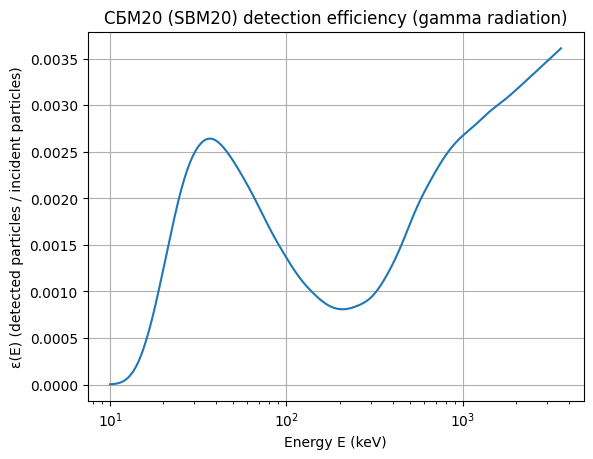

In [9]:
energies, efficiencies = radlab.simulate_gm_energies(
    detector_geometry, N_montecarlo)

radlab.plot_semilogx(f'{detector_label} detection efficiency (gamma radiation)',
                     energies, efficiencies, "ε(E) (detected particles / incident particles)")

## Ambient dose equivalent sensitivity

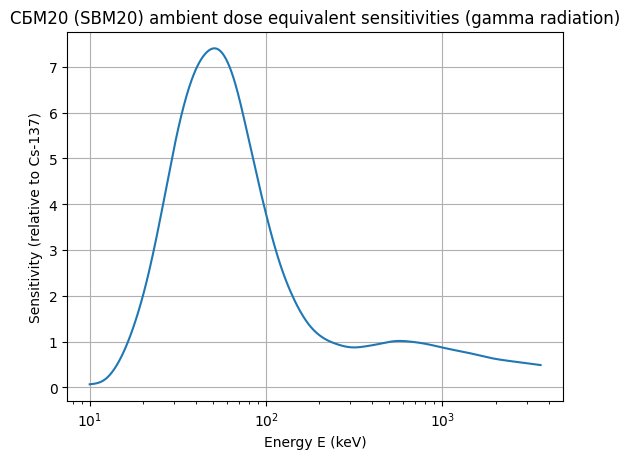

In [10]:
ambient_dose_equivalent_sensitivities = radlab.calculate_ambient_dose_equivalent_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} ambient dose equivalent sensitivities (gamma radiation)',
                     energies, ambient_dose_equivalent_sensitivities, "Sensitivity (relative to Cs-137)", normalize_cs137=True)

## Angular response

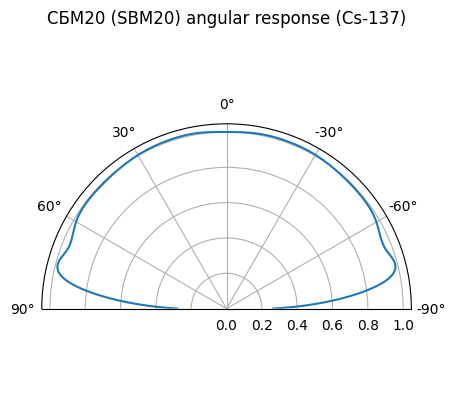

In [11]:
angles, angular_response = radlab.simulate_gm_angles(
    detector_geometry, N_montecarlo)

radlab.plot_polar(
    f'{detector_label} angular response (Cs-137)', angles, angular_response)

## Sensitivity for various sources

In [12]:
source_sensitivities = radlab.calculate_source_sensitivities(
    energies, ambient_dose_equivalent_sensitivities)

radlab.print_source_sensitivities(source_sensitivities)

| Source | Sensitivity (cpm/µSv/h) | Relative sensitivity (Cs-137) |
|-|-|-|
| Cs-137 | 106.105 | 1.000 |
| Co-60 | 84.229 | 0.794 |
| Tc-99m | 349.373 | 3.293 |
| I-131 | 98.298 | 0.926 |
| Lu-177 | 151.844 | 1.431 |
| Am-241 | 725.268 | 6.835 |
| Radium | 92.752 | 0.874 |
| Uranium ore | 102.624 | 0.967 |
| Uranium glaze | 112.598 | 1.061 |
| Depleted uranium | 112.174 | 1.057 |
| Thorium ore | 91.641 | 0.864 |
| X-ray tube (60 kV) | 608.494 | 5.735 |
| K-40 | 78.544 | 0.740 |
| Natural background | 108.051 | 1.018 |
